In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [42]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [44]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis = 1 , inplace=True)

In [46]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [47]:
train_data.Age.mean()

29.69911764705882

In [48]:

train_data.Age = train_data.Age.fillna(29)

In [49]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [50]:
train_data[train_data.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [51]:
train_data.groupby(by=['Pclass', 'Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [52]:
train_data['Embarked'] = train_data['Embarked'].fillna('C')

In [53]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Data Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

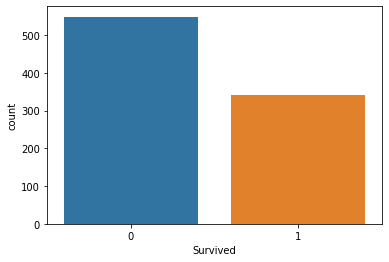

In [54]:
sns.countplot(train_data['Survived'])

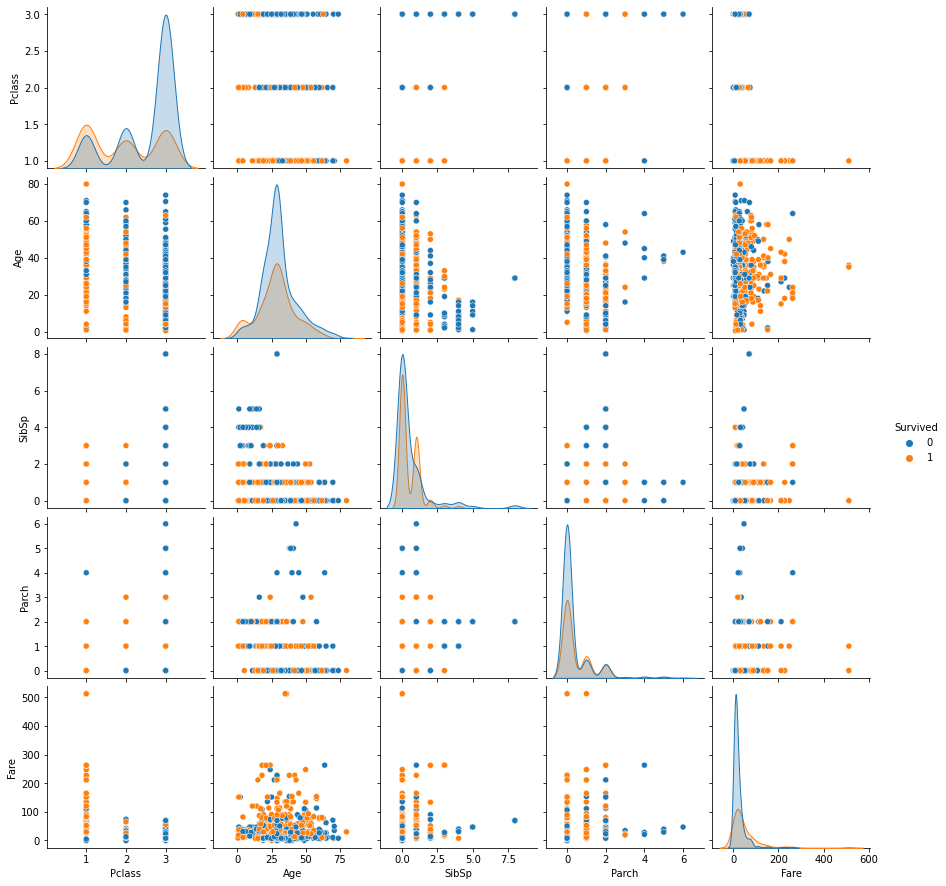

In [55]:
sns.pairplot(train_data, hue='Survived')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Fare'>

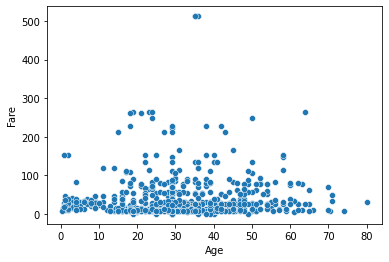

In [56]:
sns.scatterplot(train_data['Age'],train_data['Fare'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


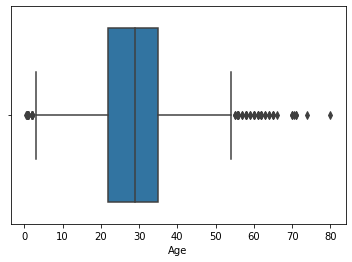

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


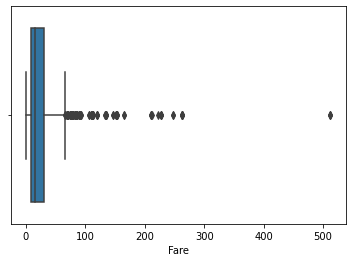

In [57]:
sns.boxplot(train_data['Age'])
plt.show()
sns.boxplot(train_data['Fare'])
plt.show()

In [58]:
train_data[train_data['Fare']>500]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [59]:
train_data[(train_data['Pclass']==1)&(train_data['Embarked']=='C')]['Fare'].median()

79.2

In [60]:
train_data.drop(index=train_data[train_data['Fare']>500].index, inplace=True)

In [61]:
train_data[train_data['Fare']>200]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.0000,S
88,1,1,female,23.0,3,2,263.0000,S
118,0,1,male,24.0,0,1,247.5208,C
299,1,1,female,50.0,0,1,247.5208,C
311,1,1,female,18.0,2,2,262.3750,C
341,1,1,female,24.0,3,2,263.0000,S
377,0,1,male,27.0,0,2,211.5000,C
380,1,1,female,42.0,0,0,227.5250,C
438,0,1,male,64.0,1,4,263.0000,S
527,0,1,male,29.0,0,0,221.7792,S


In [62]:
train_data[(train_data['Pclass']==1)&(train_data['Embarked']=='C')]['Fare'].median()

78.2667

In [63]:
train_data.drop(index=train_data[train_data['Fare']>250].index, inplace=True)

In [64]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,29.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [65]:
la = LabelEncoder()
train_data['Sex'] = la.fit_transform(train_data['Sex'])

In [66]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,29.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [67]:
train_data = pd.get_dummies(train_data, columns=['Embarked'],drop_first=True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,29.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [68]:
train_data.corr()['Survived']

Survived      1.000000
Pclass       -0.332033
Sex          -0.541742
Age          -0.065385
SibSp        -0.041964
Parch         0.078480
Fare          0.271495
Embarked_Q    0.006240
Embarked_S   -0.147032
Name: Survived, dtype: float64

### Data Preprocessing

In [69]:
ma = MinMaxScaler()
train_data['Age'] = ma.fit_transform(train_data["Age"].values.reshape(-1,1))
train_data['Fare'] = ma.fit_transform(train_data['Fare'].values.reshape(-1,1))

In [70]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,0.271174,1,0,0.029290,0,1
1,1,1,0,0.472229,1,0,0.287989,0,0
2,1,3,0,0.321438,0,0,0.032018,0,1
3,1,1,0,0.434531,1,0,0.214527,0,1
4,0,3,1,0.434531,0,0,0.032523,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.052521,0,1
887,1,1,0,0.233476,0,0,0.121202,0,1
888,0,3,0,0.359135,1,2,0.094740,0,1
889,1,1,1,0.321438,0,0,0.121202,0,0


In [71]:
x = train_data.drop('Survived', axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,0.271174,1,0,0.029290,0,1
1,1,0,0.472229,1,0,0.287989,0,0
2,3,0,0.321438,0,0,0.032018,0,1
3,1,0,0.434531,1,0,0.214527,0,1
4,3,1,0.434531,0,0,0.032523,0,1
...,...,...,...,...,...,...,...,...
886,2,1,0.334004,0,0,0.052521,0,1
887,1,0,0.233476,0,0,0.121202,0,1
888,3,0,0.359135,1,2,0.094740,0,1
889,1,1,0.321438,0,0,0.121202,0,0


In [72]:
y = train_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 882, dtype: int64

### Training and Testing

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=42)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
596,2,0,0.359135,0,0,0.133322,0,1
82,3,0,0.359135,0,0,0.031462,1,0
656,3,1,0.359135,0,0,0.031900,0,1
366,1,0,0.748681,1,0,0.304015,0,0
555,1,1,0.773813,0,0,0.107264,0,1
...,...,...,...,...,...,...,...,...
108,3,1,0.472229,0,0,0.031900,0,1
273,1,1,0.459663,0,1,0.119990,0,0
869,3,1,0.044986,1,1,0.044979,0,1
441,3,1,0.246042,0,0,0.038381,0,1


### Model

In [74]:
model = SVC(max_iter=1000)

In [75]:
model.fit(x_train,y_train)


SVC(max_iter=1000)

In [76]:
y_pred = model.predict(x_test)

In [77]:
accuracy_score(y_test,y_pred)

0.8418079096045198

In [79]:
x_test = pd.read_csv('/kaggle/input/titanic/test.csv')
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [80]:
x_test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1,inplace=True)

In [81]:
x_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [82]:
x_test.Age = x_test.Age.fillna(29)

In [84]:
x_test[x_test['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [85]:
x_test['Fare'] = x_test['Fare'].fillna(8.05)

In [86]:
x_test.Sex = la.fit_transform(x_test.Sex)

In [87]:
x_test = pd.get_dummies(x_test,columns=['Embarked'],drop_first=True)

In [88]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,1,29.0,0,0,8.0500,0,1
414,1,0,39.0,0,0,108.9000,0,0
415,3,1,38.5,0,0,7.2500,0,1
416,3,1,29.0,0,0,8.0500,0,1


In [89]:
ma = MinMaxScaler()
x_test["Age"] = ma.fit_transform(x_test['Age'].values.reshape(-1,1))
x_test['Fare'] = ma.fit_transform(x_test['Fare'].values.reshape(-1,1))

In [90]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,0.452723,0,0,0.015282,1,0
1,3,0,0.617566,1,0,0.013663,0,1
2,2,1,0.815377,0,0,0.018909,1,0
3,3,1,0.353818,0,0,0.016908,0,1
4,3,0,0.287881,1,1,0.023984,0,1
...,...,...,...,...,...,...,...,...
413,3,1,0.380193,0,0,0.015713,0,1
414,1,0,0.512066,0,0,0.212559,0,0
415,3,1,0.505473,0,0,0.014151,0,1
416,3,1,0.380193,0,0,0.015713,0,1


In [91]:
x_test_pred = model.predict(x_test)

In [100]:
Survived = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [1]:
x_test_pred.size

NameError: name 'x_test_pred' is not defined

In [101]:
Survived['Pred_value'] = x_test_pred

In [102]:
accuracy_score(Survived['Survived'],Survived['Pred_value'])

0.9832535885167464

### Submission

In [103]:
submission = pd.DataFrame({'PassengerId': x_test.index,'Survived':x_test_pred})
submission

,PassengerId,Survived
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1
...,...,...
413,413,0
414,414,1
415,415,0
416,416,0
